<a href="https://colab.research.google.com/github/rodolv1979/PyTorch_experiment_Image_classificator/blob/main/py_torch_course_o_reilly_EXAMPLE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Example 1**
First neural network

Select Runtime as GPU

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# **Define the model**

This model has three layers (500, 1000, 10). The last one is important, since we have 10 classes we need 10 output neurons

In [2]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(784, 500) # Please take a look seriously to those values in -> 784 and out -> 500
    self.fc2 = nn.Linear(500, 1000) # in -> 500 and out -> 1000
    self.fc3 = nn.Linear(1000, 10) # in -> 1000 and out 10

  # This defines the forward function
  def forward(self, x):
    x = x.view(-1, 784) # -1 is the fitting of the input function
    x = F.relu(self.fc1(x)) # Calculate the output of the first layer
    x = F.relu(self.fc2(x)) # Calculate the output of the second layer
    x = self.fc3(x) # # Calculate the output of the network
    return F.log_softmax(x, dim=1) # Logaritmic soft_max function

# **Loading Data**

Using DataLoader and DataSet torch util classes. 

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True, 
                   transform=transforms.Compose([transforms.ToTensor(),
                                                 transforms.Normalize((0.1307,), (0.3081,))
                                                 ])),
    batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([transforms.ToTensor(),
                                                 transforms.Normalize((0.1307,), (0.3081,))                                                                         
    ])),
     batch_size=1000, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# **Training and testing loops**

Boilerplate code for training and testing (almost never changes).

In [4]:
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print('Train Epoch: {} [{}, {} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad(): # speeds up the process a bit 
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
      pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
  
  test_loss /= len(test_loader.dataset)

  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))


# **Final parameter tuning and training**

In [5]:
use_cuda = torch.cuda.is_available()

torch.manual_seed(42)

device = torch.device("cuda" if use_cuda else "cpu") # Torch device with cuda available

model = Net().to(device) 

optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5) # Stochastic Gradient Descent

# Test before training

test(model, device, test_loader) # How to perform before training

for epoch in range(1, 3 + 1):
  train(model, device, train_loader, optimizer, epoch)
  test(model, device, test_loader)

torch.save(model.state_dict(), "mnist.pt") # Save the model into that file


Test set: Average loss: 2.2889, Accuracy: 1131/10000 (11%)

Train Epoch: 1 [0, 60000 (0%)]	Loss: 2.292511
Train Epoch: 1 [12800, 60000 (21%)]	Loss: 0.369877
Train Epoch: 1 [25600, 60000 (43%)]	Loss: 0.172831
Train Epoch: 1 [38400, 60000 (64%)]	Loss: 0.315055
Train Epoch: 1 [51200, 60000 (85%)]	Loss: 0.263689

Test set: Average loss: 0.1573, Accuracy: 9536/10000 (95%)

Train Epoch: 2 [0, 60000 (0%)]	Loss: 0.109764
Train Epoch: 2 [12800, 60000 (21%)]	Loss: 0.115852
Train Epoch: 2 [25600, 60000 (43%)]	Loss: 0.077184
Train Epoch: 2 [38400, 60000 (64%)]	Loss: 0.093836
Train Epoch: 2 [51200, 60000 (85%)]	Loss: 0.110903

Test set: Average loss: 0.1094, Accuracy: 9650/10000 (96%)

Train Epoch: 3 [0, 60000 (0%)]	Loss: 0.154792
Train Epoch: 3 [12800, 60000 (21%)]	Loss: 0.104992
Train Epoch: 3 [25600, 60000 (43%)]	Loss: 0.090678
Train Epoch: 3 [38400, 60000 (64%)]	Loss: 0.086841
Train Epoch: 3 [51200, 60000 (85%)]	Loss: 0.082601

Test set: Average loss: 0.0862, Accuracy: 9731/10000 (97%)



# **Manual testing of the model** 

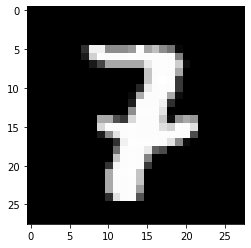

In [6]:
import matplotlib.pyplot as plt

test_image = test_loader.dataset.data[3848]
plt.imshow(test_image, cmap='gray')

In [7]:
out = model(test_image.float().cuda())
out

tensor([[ -857.5289,  -641.4884,  -375.1391,  -200.4999,  -945.4197, -1174.8523,
         -1266.8689,     0.0000,  -749.2133,  -775.5253]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)

In [8]:
out.argmax(dim=1)

tensor([7], device='cuda:0')